In [1]:
import pandas as pd
import numpy as np
from sklearn import tree

In [4]:
data = pd.read_csv("/home/oop/Загрузки/dogs_n_cats.csv")
data.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [5]:
data = pd.get_dummies(data)
data["qwe"] = pd.Series([0 for i in range(len(data["Гавкает"]))])
del data["Вид_котик"]
data.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид_собачка,qwe
0,15,18.0,1,1,0,1,0
1,20,24.0,1,0,0,1,0
2,34,40.8,1,1,0,1,0
3,26,31.2,1,1,0,1,0
4,16,19.2,1,1,0,1,0


In [6]:
X = data.drop(["Вид_собачка"], axis=1)
y = data[["Вид_собачка"]]

In [7]:
from featexp import get_univariate_plots

/home/oop/anaconda3/lib/python3.7/site-packages/matplotlib/style/core.py:153: UserWarning: In /home/oop/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  library = read_style_directory(BASE_LIBRARY_PATH)
/home/oop/anaconda3/lib/python3.7/site-packages/matplotlib/style/core.py:153: UserWarning: In /home/oop/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  library = read_style_directory(BASE_LIBRARY_PATH)
/home/oop/anaconda3/lib/python3.7/site-packages/matplotlib/style/core.py:153: UserWarning: In /home/oop/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  library = read_style_directory(BASE_LIBRARY_PATH)
/home/oop/a

ImportError: cannot import name '_string_to_bool' from 'matplotlib.cbook' (/home/oop/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py)

                                           Plots for Длина                                            


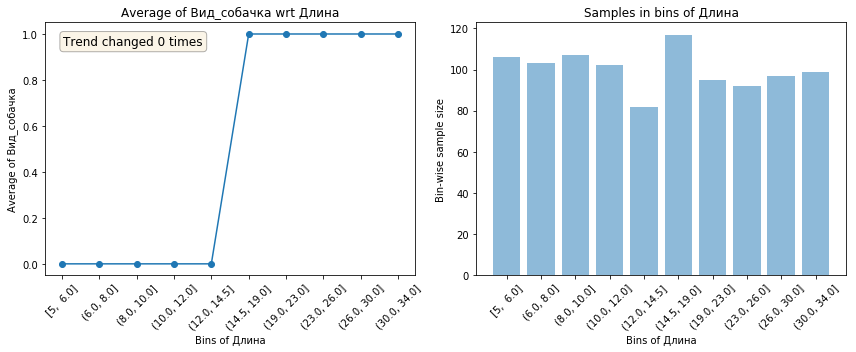

--------------------------------------------------------------------------------------------------------------


                                           Plots for Высота                                           


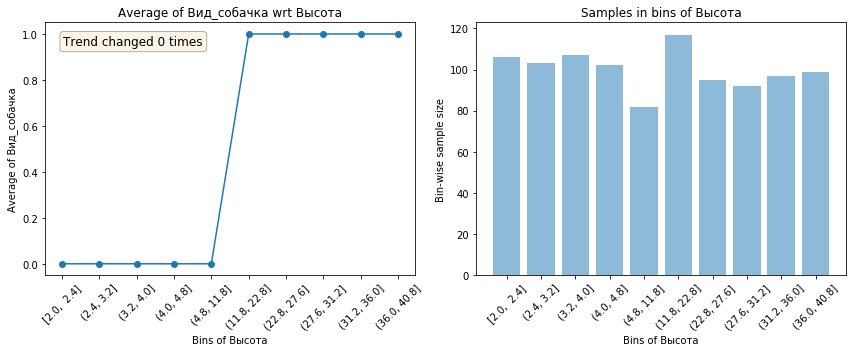

--------------------------------------------------------------------------------------------------------------


                                          Plots for Шерстист                                          


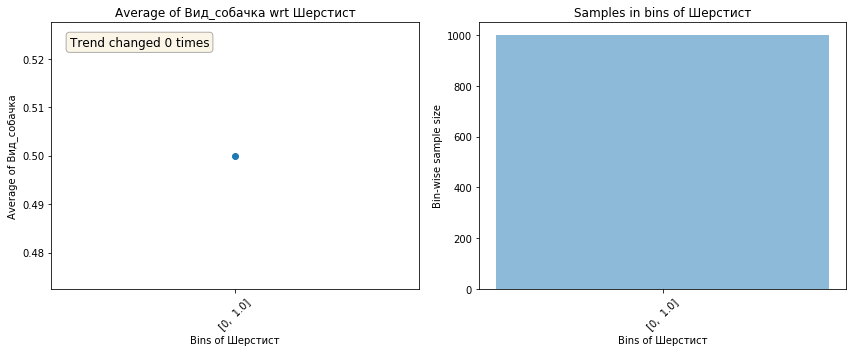

--------------------------------------------------------------------------------------------------------------


                                          Plots for Гавкает                                           


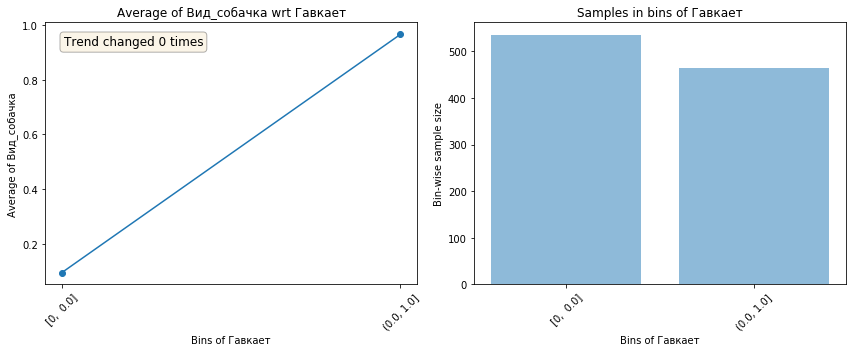

--------------------------------------------------------------------------------------------------------------


                                     Plots for Лазает по деревьям                                     


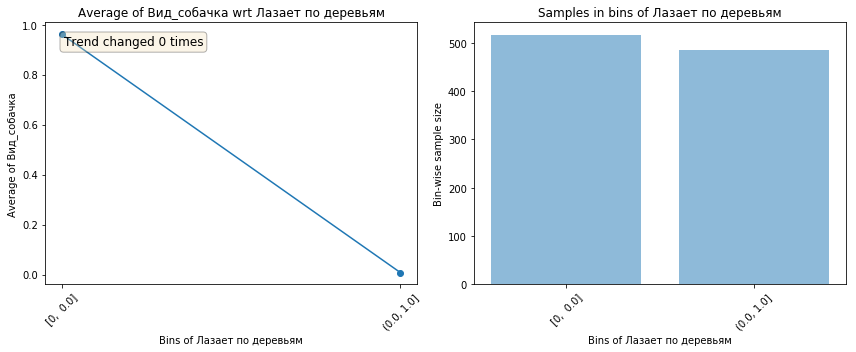

--------------------------------------------------------------------------------------------------------------


                                            Plots for qwe                                             


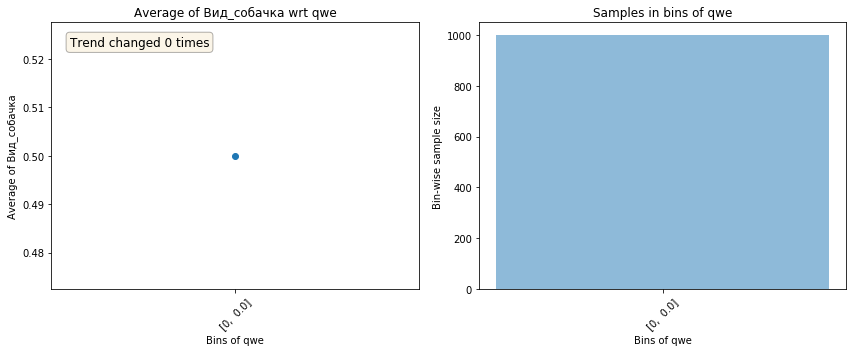

--------------------------------------------------------------------------------------------------------------




In [8]:
#get_univariate_plots(data=data, target_col='Вид_собачка', features_list=data.columns[:-1])
get_univariate_plots(data=data, target_col='Вид_собачка', features_list=data.columns[:])

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
x_train

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,qwe
154,17,20.4,1,1,0,0
505,14,5.6,1,0,1,0
43,23,27.6,1,1,0,0
894,5,2.0,1,0,1,0
95,16,19.2,1,1,0,0
...,...,...,...,...,...,...
472,17,20.4,1,1,0,0
109,24,28.8,1,1,0,0
650,9,3.6,1,0,1,0
571,14,5.6,1,1,1,0


In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
clf = tree.DecisionTreeClassifier(random_state = 123)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [54]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10, random_state = 123)

In [12]:
parametrs = {"criterion" : ["entropy", "gini"], "max_depth" : range(1, 10), 'class_weight' : [None, "balanced"], "min_samples_split" : range(2, 10), "min_samples_leaf" : range(1, 10)}

In [13]:
gsc = GridSearchCV(clf, parametrs, cv=5, n_jobs = -1, scoring="f1")
gsc

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=123,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                    

In [16]:
gsc.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=123,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                    

In [17]:
gsc.best_score_

1.0

In [18]:
gsc.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [19]:
best_clf = gsc.best_estimator_

In [20]:
predictions = best_clf.predict(x_test)
predictions

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,

[Text(1116.0, 1630.8000000000002, 'X[0] <= 14.5\nentropy = 1.0\nsamples = 670\nvalue = [331, 339]'),
 Text(558.0, 543.5999999999999, 'entropy = 0.0\nsamples = 331\nvalue = [331, 0]'),
 Text(1674.0, 543.5999999999999, 'entropy = 0.0\nsamples = 339\nvalue = [0, 339]')]

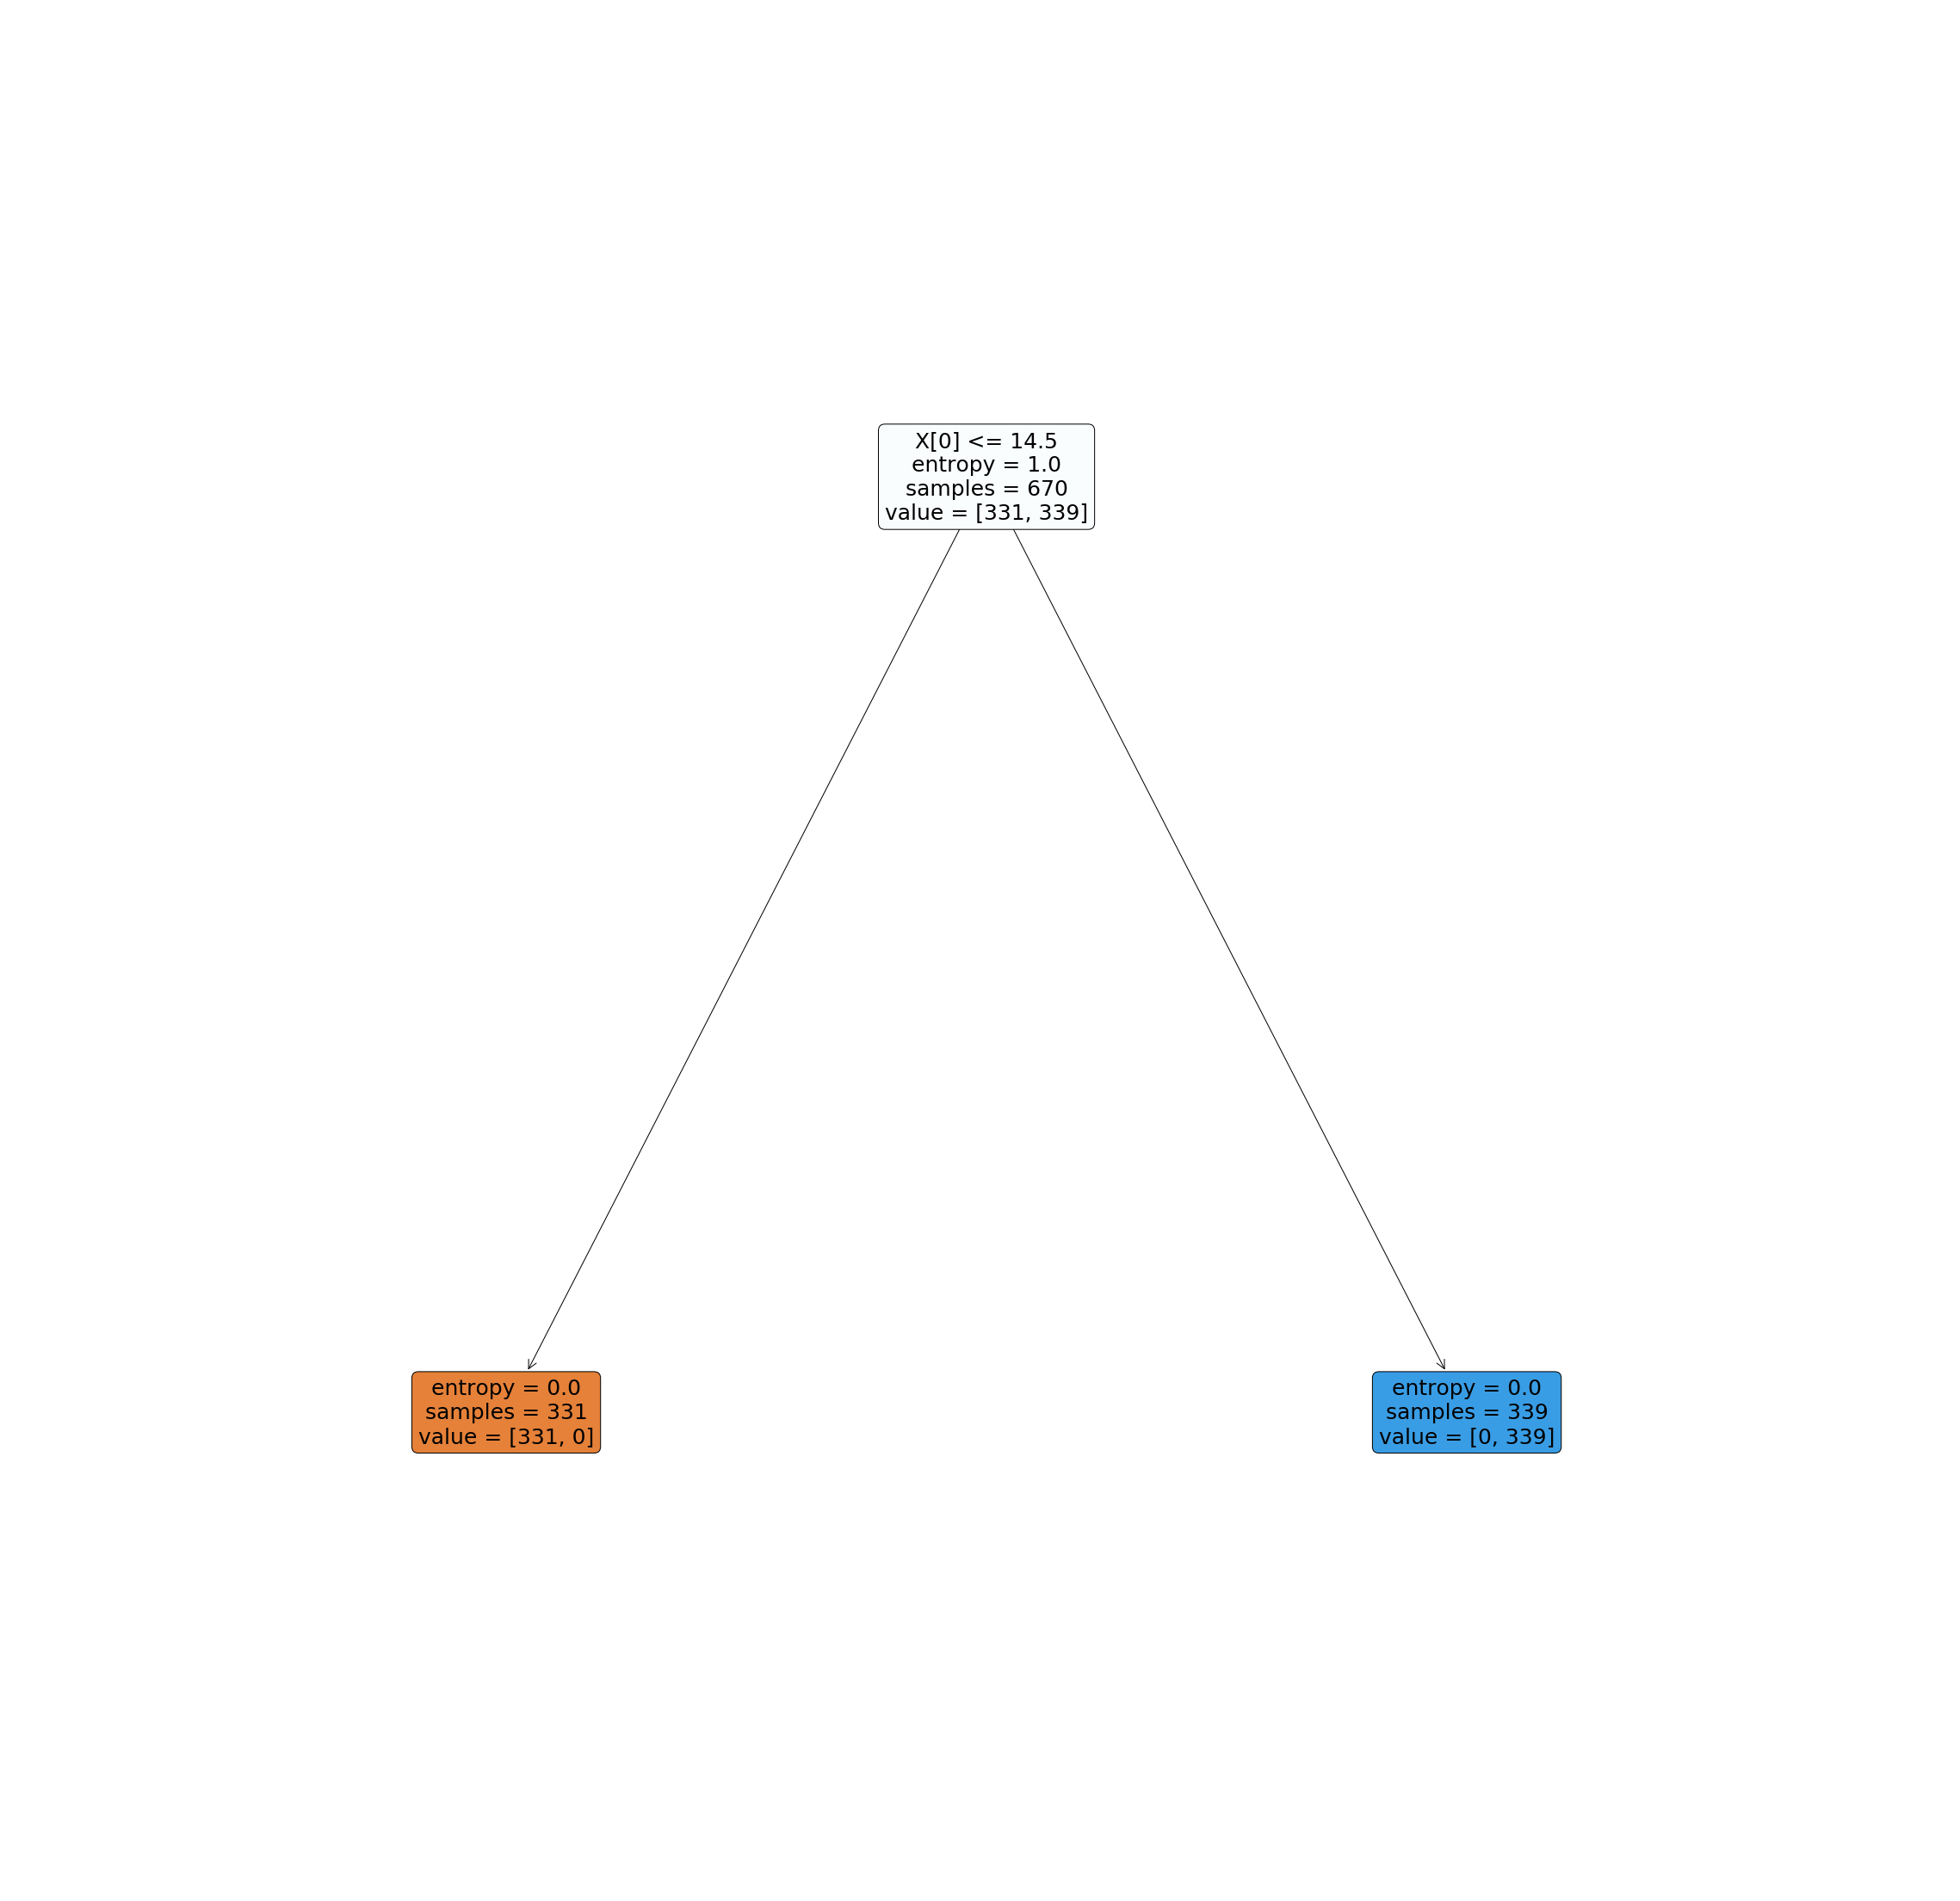

In [21]:
#import seaborn as sb
from matplotlib import pyplot as plt
#plt.figure(figsize=(40,40))  
#_ = tree.plot_tree(topTree, 
             #filled=True, fontsize=25, rounded = True)
#plt.show()
ax = plt.subplots(figsize=(40, 40))
tree.plot_tree(best_clf, filled=True, fontsize=25, rounded = True)

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions) # precision and recall

array([[169,   0],
       [  0, 161]])

In [23]:
pd.DataFrame({"feature" : data.drop(["Вид_собачка"], axis = 1).columns, 
             "importance" : best_clf.feature_importances_}).sort_values("importance")

,feature,importance
1,Высота,0.0
2,Шерстист,0.0
3,Гавкает,0.0
4,Лазает по деревьям,0.0
5,qwe,0.0
0,Длина,1.0


In [9]:
from keras.models import Sequental

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [8]:
import keras

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'